Part -1 Identifying frauds with self organization map

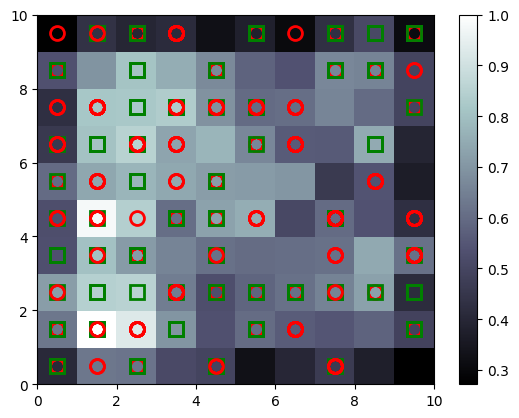

[[1.5697460e+07 1.0000000e+00 2.2000000e+01 ... 2.0000000e+00
  4.2000000e+02 2.8400000e+02]
 [1.5586183e+07 1.0000000e+00 1.7080000e+01 ... 2.0000000e+00
  1.6000000e+02 9.0000000e+00]
 [1.5683993e+07 1.0000000e+00 1.6000000e+01 ... 2.0000000e+00
  0.0000000e+00 7.0000000e+00]
 ...
 [1.5580366e+07 1.0000000e+00 2.9170000e+01 ... 2.0000000e+00
  3.2900000e+02 1.0000000e+00]
 [1.5595010e+07 1.0000000e+00 3.4170000e+01 ... 2.0000000e+00
  0.0000000e+00 2.2200000e+02]
 [1.5583552e+07 1.0000000e+00 2.0500000e+01 ... 2.0000000e+00
  2.0000000e+02 3.0010000e+03]]
Fraud Customer IDs
15697460
15586183
15683993
15797767
15804235
15700300
15620570
15667588
15766183
15808662
15684722
15772329
15734649
15646082
15717629
15757188
15604536
15635598
15647191
15776545
15792107
15623369
15793896
15650591
15813192
15633608
15675450
15638610
15789611
15668679
15649160
15682686
15809837
15632789
15761554
15707602
15811690
15772941
15631267
15759387
15712483
15739548
15699839
15648069
15731586
15705918
157

In [2]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pylab import bone, pcolor, colorbar, plot, show

#importing Dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[: , :-1].values
Y = dataset.iloc[: , -1].values

#Feature Scaling
from  sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0, 1))
X = sc.fit_transform(X)

#Training the SOM
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

#Visualize the result
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[Y[i]],
         markeredgecolor = colors[Y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

#Finding the frauds
mapping = som.win_map(X)
fraud_list = []
keys = [(1,5), (2,4), (2,3), (3,3), (6,2), (7,4), (8,8)]

for key in keys:
    if key in mapping:
        array = np.array(mapping[key])
        # Only include non-empty arrays
        if array.shape[0] > 0:  
            fraud_list.append(array)

if fraud_list:
    frauds = np.concatenate(fraud_list, axis=0)
    frauds = sc.inverse_transform(frauds)
else:
    # Handle the case where no frauds are found
    frauds = np.array([])  

print(frauds)

print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Part-2 going unsupervised to supervised deep learning 

In [3]:
#Creating matrix of features
customer = dataset.iloc[: , 1:].values

In [7]:
#Creating the dependent variable
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i, 0] in frauds:
        is_fraud[i] = 1
print(is_fraud)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

Part-3 prediction customer cheat using ANN

In [8]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
sc = StandardScaler()
customer = sc.fit_transform(customer)


ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units= 2, kernel_initializer = 'uniform', activation='relu', input_dim = 15))
ann.add(tf.keras.layers.Dense(units= 1, kernel_initializer = 'uniform', activation='sigmoid'))

ann.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

ann.fit(customer, is_fraud, batch_size = 1, epochs = 2)



Epoch 1/2


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 612us/step - accuracy: 0.8714 - loss: 0.6358
Epoch 2/2
690/690 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.8460 - loss: 0.4439
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [21]:
# Making Predictions
y_pred = ann.predict(customer)

# Ensuring the dimensions match before concatenating
if dataset.iloc[:, 0:1].values.shape[0] == y_pred.shape[0]:
    # Concatenating Customer IDs with Prediction Probabilities
    y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis=1)
    y_pred = y_pred[y_pred[:, 1].argsort()]
    
    # Printing the results with proper formatting
    for row in y_pred:
        print(f"Customer ID: {int(row[0])}, Prediction Probability: {row[1]:.4f}")
else:
    print("Error: Mismatch in number of rows between Customer IDs and Predictions.")

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step
Customer ID: 15710138, Prediction Probability: 0.0344
Customer ID: 15809909, Prediction Probability: 0.0384
Customer ID: 15783859, Prediction Probability: 0.0387
Customer ID: 15673747, Prediction Probability: 0.0390
Customer ID: 15603683, Prediction Probability: 0.0399
Customer ID: 15788215, Prediction Probability: 0.0401
Customer ID: 15666012, Prediction Probability: 0.0409
Customer ID: 15713983, Prediction Probability: 0.0410
Customer ID: 15643056, Prediction Probability: 0.0416
Customer ID: 15740411, Prediction Probability: 0.0435
Customer ID: 15679622, Prediction Probability: 0.0435
Customer ID: 15613673, Prediction Probability: 0.0436
Customer ID: 15680901, Prediction Probability: 0.0442
Customer ID: 15795690, Prediction Probability: 0.0468
Customer ID: 15596165, Prediction Probability: 0.0475
Customer ID: 15648681, Prediction Probability: 0.0476
Customer ID: 15690772, Prediction Probability: 0.0491
Customer ID: 15636767, Prediction Probabi